# TP 1 Ciencia de datos
---------------

## Exploración Preliminar y Gráficos

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
from random import randint
from scipy.stats import shapiro, ttest_rel, ttest_ind


In [2]:
data = pd.read_csv('tiempos.txt', delim_whitespace=True)

In [3]:
data

,Atleta,tiempo_sol,tiempo_nublado,tiempo_lluvia
0,1,11.1,11.3,19.4
1,2,13.0,12.8,18.2
2,3,16.1,16.0,19.0
3,4,14.5,14.1,18.9
4,5,12.0,12.5,19.1
5,6,11.0,11.6,18.7
6,7,15.1,14.6,189.0
7,8,14.4,14.2,19.9
8,9,16.1,16.1,18.5
9,10,17.0,16.7,19.2


/usr/lib/python3/dist-packages/matplotlib/figure.py:372: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


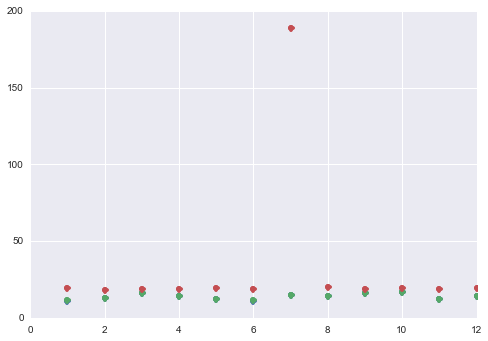

In [4]:
figure1 = plt.figure()
plot1 = plt.plot(data["Atleta"], data["tiempo_sol"],'o')
plot2 = plt.plot(data["Atleta"], data["tiempo_nublado"],'o')
plot3 = plt.plot(data["Atleta"], data["tiempo_lluvia"],'o')
figure1.show()


In [5]:
data.drop(6, inplace=True)

Hay un único outlier que claramente es un error de medición y dificulta el estudio del resto de los datos. Para que todo atleta tenga sus tiempos medidos tanto con lluvia como para los días de sol y nublados, borramos todas las mediciones del atleta con el outlier. 

/usr/lib/python3/dist-packages/matplotlib/figure.py:372: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


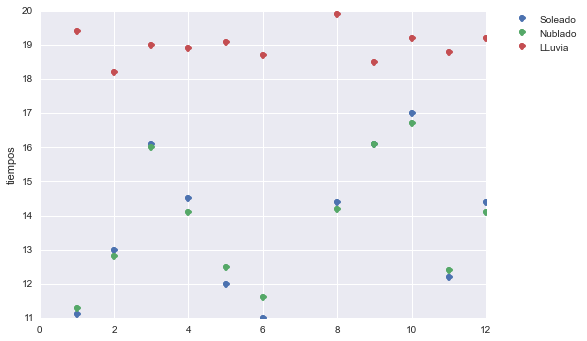

In [6]:
fontP = FontProperties()
figure1 = plt.figure()
plt.ylabel("tiempos")
plot1 = plt.plot(data["Atleta"], data["tiempo_sol"],'o', label="Soleado")
plot2 = plt.plot(data["Atleta"], data["tiempo_nublado"],'o', label="Nublado")
plot3 = plt.plot(data["Atleta"], data["tiempo_lluvia"],'o', label="LLuvia")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

figure1.show()

# Tests

### Algunas cosas que queremos responder:

* Los atletas son más lentos en días de lluvia que en días soleados.
* El cielo nublado no influye en los tiempos de los atletas.
* La velocidad en días de lluvia es independiente del atleta.
* El clima influye en la velocidad de los atletas

### Primer test:

Vamos a hacer un test de permutaciones entre los tiempos de los días de sol y los de los días de lluvia. Tenemos como hipótesis nula H0 que el tiempo en días de lluvia es menor o igual al tiempo en días soleados.

Para no perder la individualidad de cada atleta, nuestras permutaciones son entre los tiempos de cada uno
.

Por ejemplo:

In [7]:
from IPython.display import display


print ("Original")
display(data[["Atleta", "tiempo_sol", "tiempo_lluvia"]])

print ("Permutacion")

data_copy = data.copy()

data_copy["tiempo_sol"][2], data_copy["tiempo_lluvia"][2] = data_copy["tiempo_lluvia"][2], data_copy["tiempo_sol"][2]
data_copy["tiempo_sol"][4], data_copy["tiempo_lluvia"][4] = data_copy["tiempo_lluvia"][4], data_copy["tiempo_sol"][4]
data_copy["tiempo_sol"][7], data_copy["tiempo_lluvia"][7] = data_copy["tiempo_lluvia"][7], data_copy["tiempo_sol"][7]
data_copy["tiempo_sol"][8], data_copy["tiempo_lluvia"][8] = data_copy["tiempo_lluvia"][8], data_copy["tiempo_sol"][8]
data_copy["tiempo_sol"][11], data_copy["tiempo_lluvia"][11] = data_copy["tiempo_lluvia"][11], data_copy["tiempo_sol"][11]


display(data_copy[["Atleta", "tiempo_sol", "tiempo_lluvia"]])


Original


,Atleta,tiempo_sol,tiempo_lluvia
0,1,11.1,19.4
1,2,13.0,18.2
2,3,16.1,19.0
3,4,14.5,18.9
4,5,12.0,19.1
5,6,11.0,18.7
7,8,14.4,19.9
8,9,16.1,18.5
9,10,17.0,19.2
10,11,12.2,18.8


Permutacion


,Atleta,tiempo_sol,tiempo_lluvia
0,1,11.1,19.4
1,2,13.0,18.2
2,3,19.0,16.1
3,4,14.5,18.9
4,5,19.1,12.0
5,6,11.0,18.7
7,8,19.9,14.4
8,9,18.5,16.1
9,10,17.0,19.2
10,11,12.2,18.8


Nuestra diferencia de medias  5.19090909091
Cant mayor  1.0
Cant menor  2047.0
Proporción mayor 0.00048828125


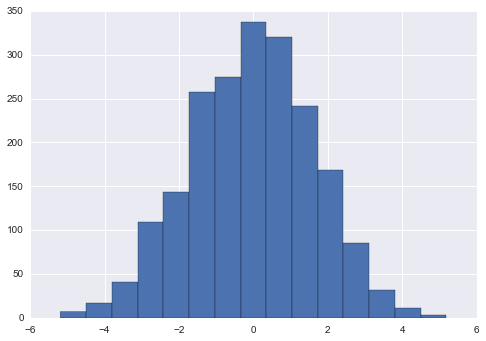

In [11]:
diff = data["tiempo_lluvia"].mean() - data["tiempo_sol"].mean()
print ("Nuestra diferencia de medias ", diff)
permutations = []

for i in range(2**len(data["tiempo_lluvia"])):
    mean_lluvia = 0.0
    mean_soleado = 0.0   
    for j in range(len(data["tiempo_lluvia"])+1):
        if j != 6:
            if randint(0,1):
                mean_lluvia += data["tiempo_sol"][j]
                mean_soleado += data["tiempo_lluvia"][j]
            else:
                mean_soleado += data["tiempo_sol"][j]
                mean_lluvia += data["tiempo_lluvia"][j]
    mean_soleado /= len(data["tiempo_lluvia"])
    mean_lluvia /= len(data["tiempo_lluvia"])
    permutations.append(mean_lluvia - mean_soleado)

plt.hist(permutations,15)
cant_mayor = 0.0
cant_menor = 0.0
for permutation in permutations:
    if permutation >= diff:
        cant_mayor += 1
    else:
        cant_menor += 1
print ("Cant mayor ", cant_mayor)
print ("Cant menor ", cant_menor)
print ("Proporción mayor", cant_mayor/(cant_menor + cant_mayor))

Rechazamos la hipotesis nula porque el p-valor << 0.05, asi que podemos afirmar que el tiempo de dia soleado es menor que el de dia lluvioso.

# Segundo test:

Hacemos un t-test de muestras apareadas entre tiempo nublado y lluvioso. Para usar el t-test veamos primero que las variables estan normalmente distribuidas, tienen igual varianza y son independientes.

* Para ver que son normalmente distribuidas usamos el test de Shapiro, que tiene como hipotesis nula que los valores tienen una distribución normal.

In [9]:
print ("pvalue para dias nublados (shapiro): " , shapiro(data["tiempo_nublado"])[1])
print ("pvalue para dias lluviosos (shapiro): ", shapiro(data["tiempo_lluvia"])[1])

pvalue para dias nublados (shapiro):  0.3774447739124298
pvalue para dias lluviosos (shapiro):  0.9883151054382324


Dado el elevado p-value no podemos rechazar la hipotesis nula (no podemos decir que no están normalmente distribuidas). Esto nos da una base más sólida para afirmar que sí lo están.

* Para ver que tienen la misma varianza usamos el F-test

In [12]:
print ("pvalues para algo")

pvalues para algo


In [16]:
#print "pvalue para dias nublados: " ,fisher_exact(data["tiempo_nublado"])
#print "pvalue para dias lluviosos: " ,fisher_exact(data["tiempo_lluvia"])

#t-test entre tiempo nublado y lluvioso
print ("pvalue del test de Student: ", ttest_rel(data["tiempo_nublado"], data["tiempo_lluvia"])[1])

pvalue del test de Student:  3.77285476952e-06


El pvalue obtenido es considerablemente chico, por lo que podemos rechazar la hipótesis nula del test, es decir, podemos afirmar que en los días de lluvia los corredores tardan más tiempo.

# Tercer test:

Lo mismo entre tiempo soleado y nublado
        

In [19]:
print ("pvalue para dias nublados (shapiro): " , shapiro(data["tiempo_nublado"])[1])
print ("pvalue para dias soleado (shapiro): ", shapiro(data["tiempo_sol"])[1])

pvalue para dias nublados (shapiro):  0.3774447739124298
pvalue para dias soleado (shapiro):  0.42219114303588867


In [ ]:
print ttest_rel(data["tiempo_nublado"], data["tiempo_sol"]).pvalue

No podemos rechazar la hipotesis nula.

# Cuarto test:

Suponemos que si un corredor es más rápido que otro en los días de sol, también lo es en los días de lluvia. Para ello realizamos un test de correlación de Pearson entre los tiempos de días soleados y días de lluvia.

/usr/lib/python3/dist-packages/matplotlib/figure.py:372: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


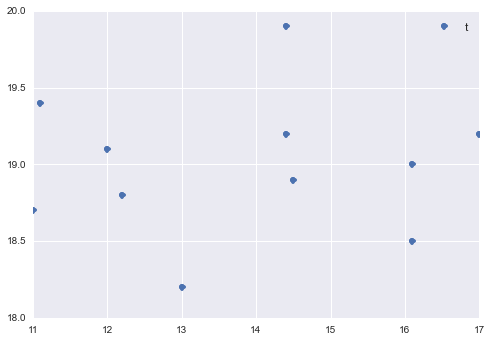

In [22]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
figure1 = plt.figure()
#plot2 = plt.plot(data["tiempo_sol"], data["tiempo_nublado"],'o')
plot3 = plt.plot(data["tiempo_sol"], data["tiempo_lluvia"],'o')
plt.legend("title", prop = fontP)
figure1.show()

In [26]:
from scipy.stats import pearsonr
print ("pvalue del test de pearson: ", pearsonr(data["tiempo_sol"], data["tiempo_lluvia"])[1])

pvalue del test de pearson:  0.849493580725


Intuitivamente viendo el gráfico no parecería haber correlación evidente entre los datos. Esta intuición se ve reforzada por el valor elevado del pvalue del test de pearson, que no nos permite afirmar la existencia de algùn tipo de correlación.

# Quinto test:
 
Queremos ver la correlacion entre los tiempos en dias soleados vs los nublados.

In [ ]:
from scipy.stats import pearsonr
print pearsonr(data["tiempo_sol"], data["tiempo_nublado"])